**Problem Statement** : Customer churn prediction refers to the process of identifying customers who are likely to stop using a product or service in the near future. It is a valuable predictive analytics technique used by businesses to forecast customer behavior and take proactive measures to retain customers.

*Kaggle* Dataset Link : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Table of Contents
- Importing Libraries
- Exploratory Data Analysis
- Univariate Analysis
- Data Cleaning
- Saving Data for Model Building

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset and getting basic information
Dataset Info: Sample Data Set containing Telco customer data and showing customers left last month

In [2]:
dataset = pd.read_csv('../data/Telco-Customer-Churn.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
dataset.shape

(7043, 21)

In [5]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
dataset[dataset.duplicated()].shape[0]

0

In [7]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# CustomerID is not required for prediction so we will drop it
dataset.drop('customerID', axis=1, inplace=True)

In [9]:
#since total changes is having numerical value but dtype is object to change it into numeric
dataset['TotalCharges']=pd.to_numeric(dataset['TotalCharges'],errors='coerce')

In [10]:
dataset.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [11]:
dataset.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [12]:
# Check the descriptive statistics of numeric variables
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not proper

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

## Exploratory Data Analysis

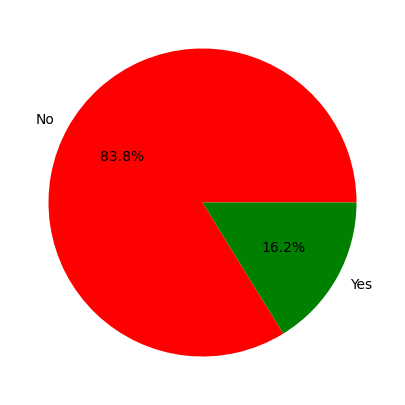

In [13]:
#pie chart to count senior citizen
plt.figure(figsize=(10,5))
plt.pie(dataset["SeniorCitizen"].value_counts(),autopct="%.1f%%",labels=["No","Yes"], colors=['red', 'green'])
plt.show()

We can see 83.8 % of the customers are senior citizen and only 16.2% are adult customer.

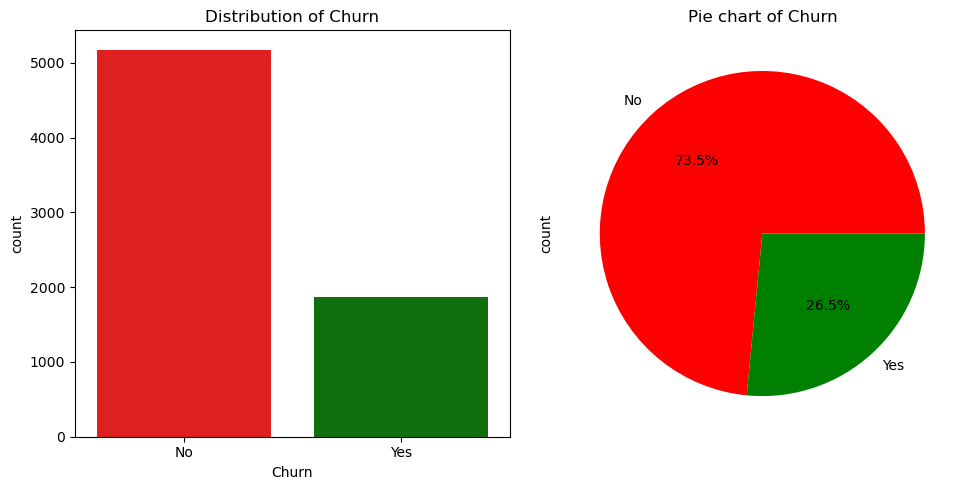

In [17]:
# Check the distribution of churn class
plt.figure(figsize=(10,5))
# Countplot
plt.subplot(1,2,1)
sns.countplot(data=dataset, x="Churn", palette={"No":"red", "Yes":"green"})
plt.title("Distribution of Churn")
# Pie chart
plt.subplot(1,2,2)
dataset['Churn'].value_counts().plot(
    kind='pie',
    autopct="%1.1f%%",
    labels=['No','Yes'],        # Ensure order matches your value_counts
    colors=['red','green']      # No = red, Yes = green
)
plt.title('Pie chart of Churn')
plt.tight_layout()
plt.show()

In [18]:
#perentage of each class sample distribution
print("Customer Churn : {}%".format(np.round((len(dataset[dataset["Churn"]=="Yes"])/len(dataset)*100),decimals=2)))
print("Customer Not Churn : {}%".format(np.round((len(dataset[dataset["Churn"]=="No"])/len(dataset)*100),decimals=2)))

Customer Churn : 26.54%
Customer Not Churn : 73.46%


In [19]:
#how much loss we are having because of customer churn
# Convert "TotalCharges" column to numeric
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"], errors='coerce')
churn_customers=dataset[dataset["Churn"]=="Yes"]
loss=churn_customers["TotalCharges"].sum()
total_revenue=dataset["TotalCharges"].sum()
print("We have lost arround {}$ due to customer churn".format(loss))
print("We have lost arround {} percentage of revengue due to customer churn".format(np.round(loss/total_revenue*100,decimals=2)))

We have lost arround 2862926.9$ due to customer churn
We have lost arround 17.83 percentage of revengue due to customer churn


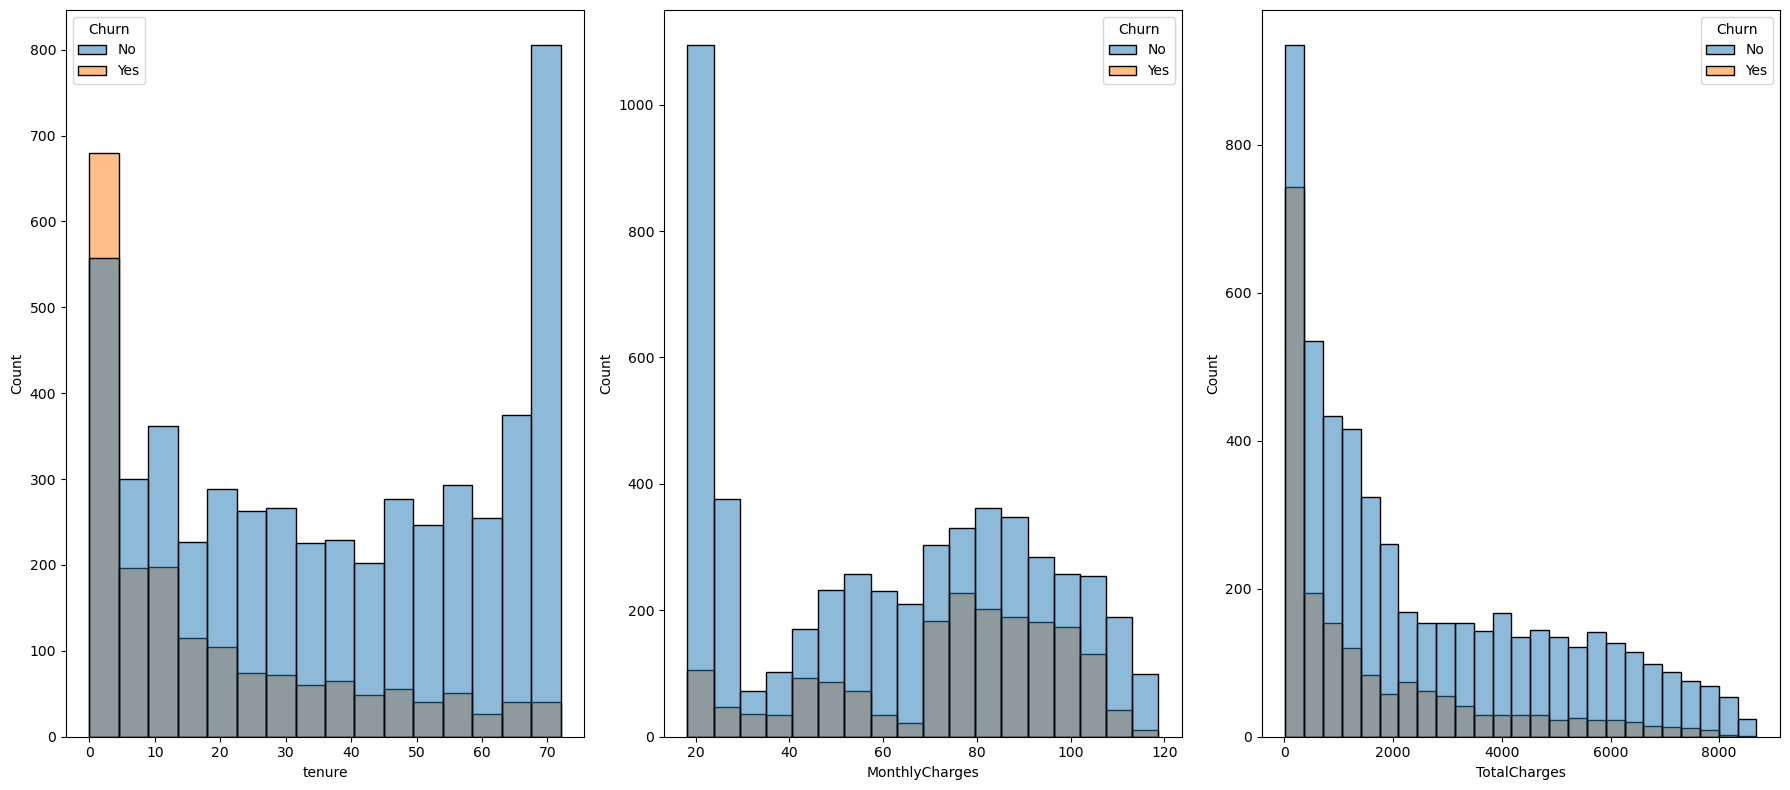

In [23]:
#plot numerical features with histogram
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
axes=axs.flatten()
num_columns=['tenure', 'MonthlyCharges', 'TotalCharges']
for i,col in enumerate(num_columns):
  if(col!='SeniorCitizen'):
    sns.histplot(x=col,data=dataset,hue='Churn',ax=axes[i])
fig.tight_layout()
plt.show()

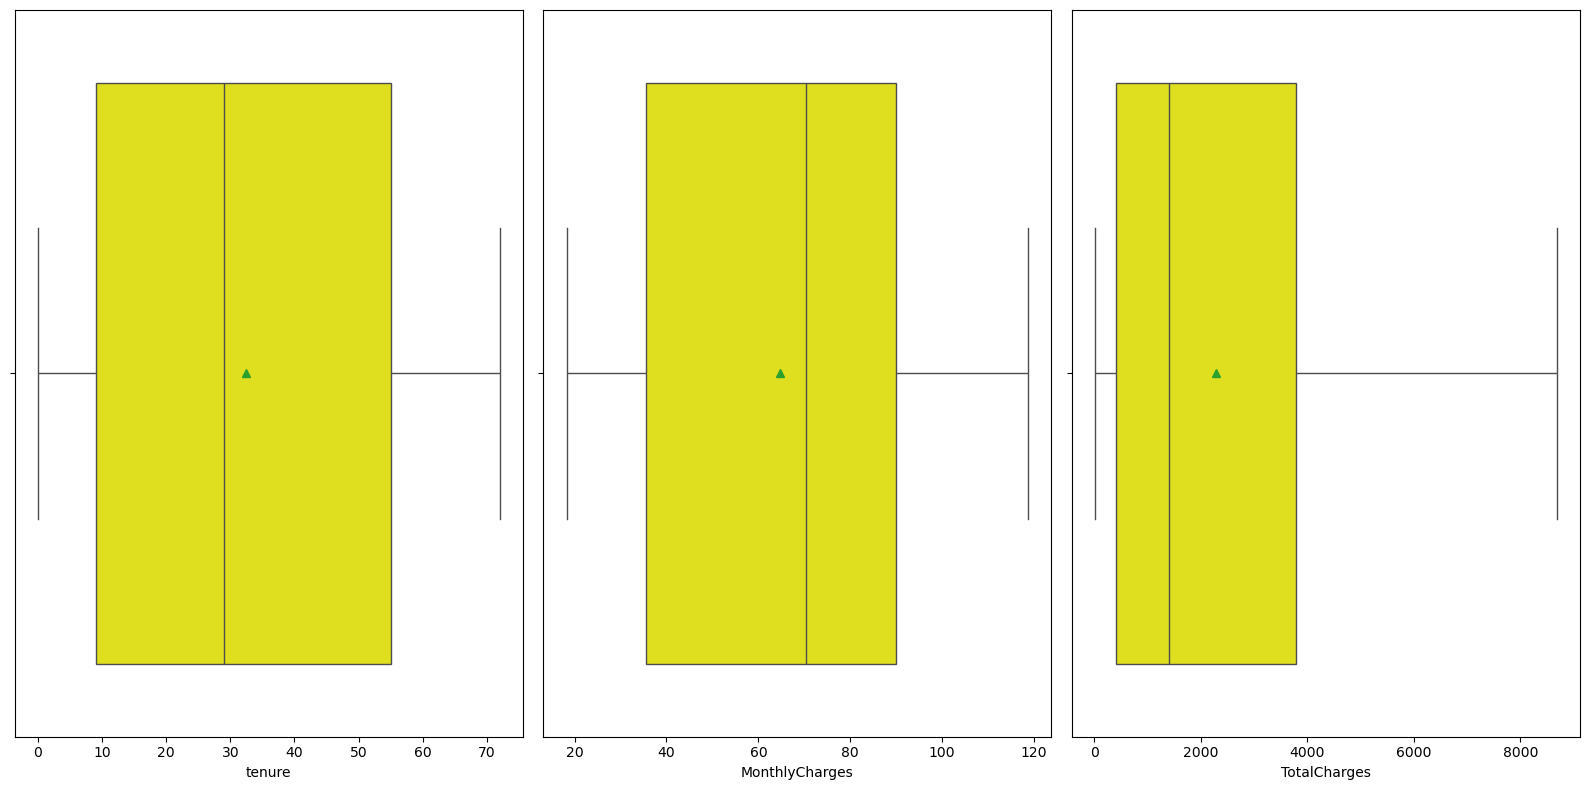

In [33]:
#plot numerical features with boxplot
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(16,8))
axes=axs.flatten()
num_columns=['tenure', 'MonthlyCharges', 'TotalCharges']
for i,col in enumerate(num_columns):
  if(col!='SeniorCitizen'):
    sns.boxplot(x=col,data=dataset,showmeans=True,ax=axes[i],color='yellow')
fig.tight_layout()
plt.show()

After plotting histogram and boxplot we can conclude that there is no outlier present in numeric dataset so we don't need to do any kind of outlier treatment.

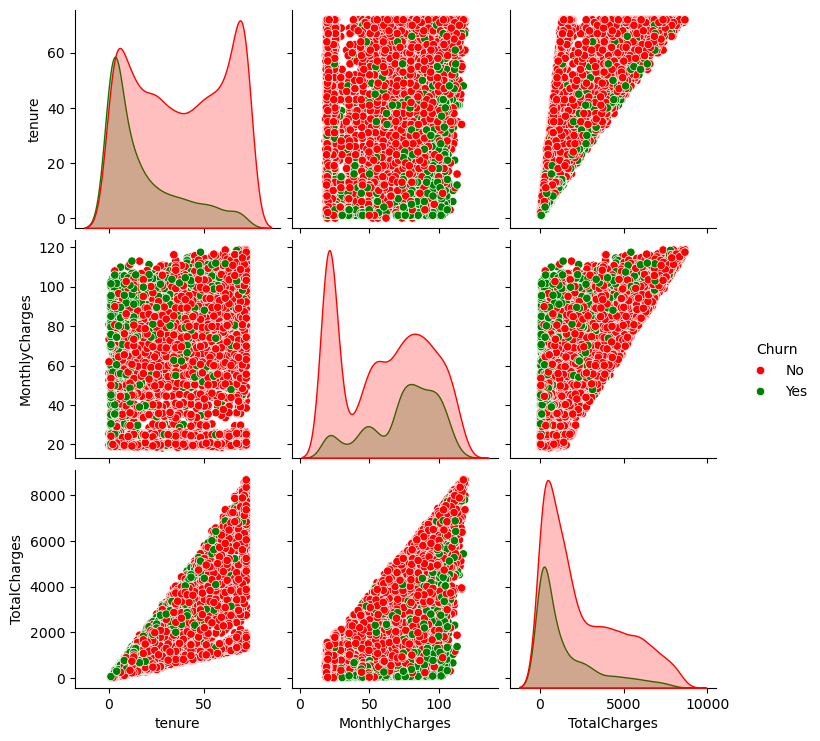

In [37]:
sns.pairplot(dataset.drop(columns="SeniorCitizen"),hue="Churn",kind="scatter",palette={"No":"Red", "Yes":"Green"})
plt.show()

## Univariate Analysis

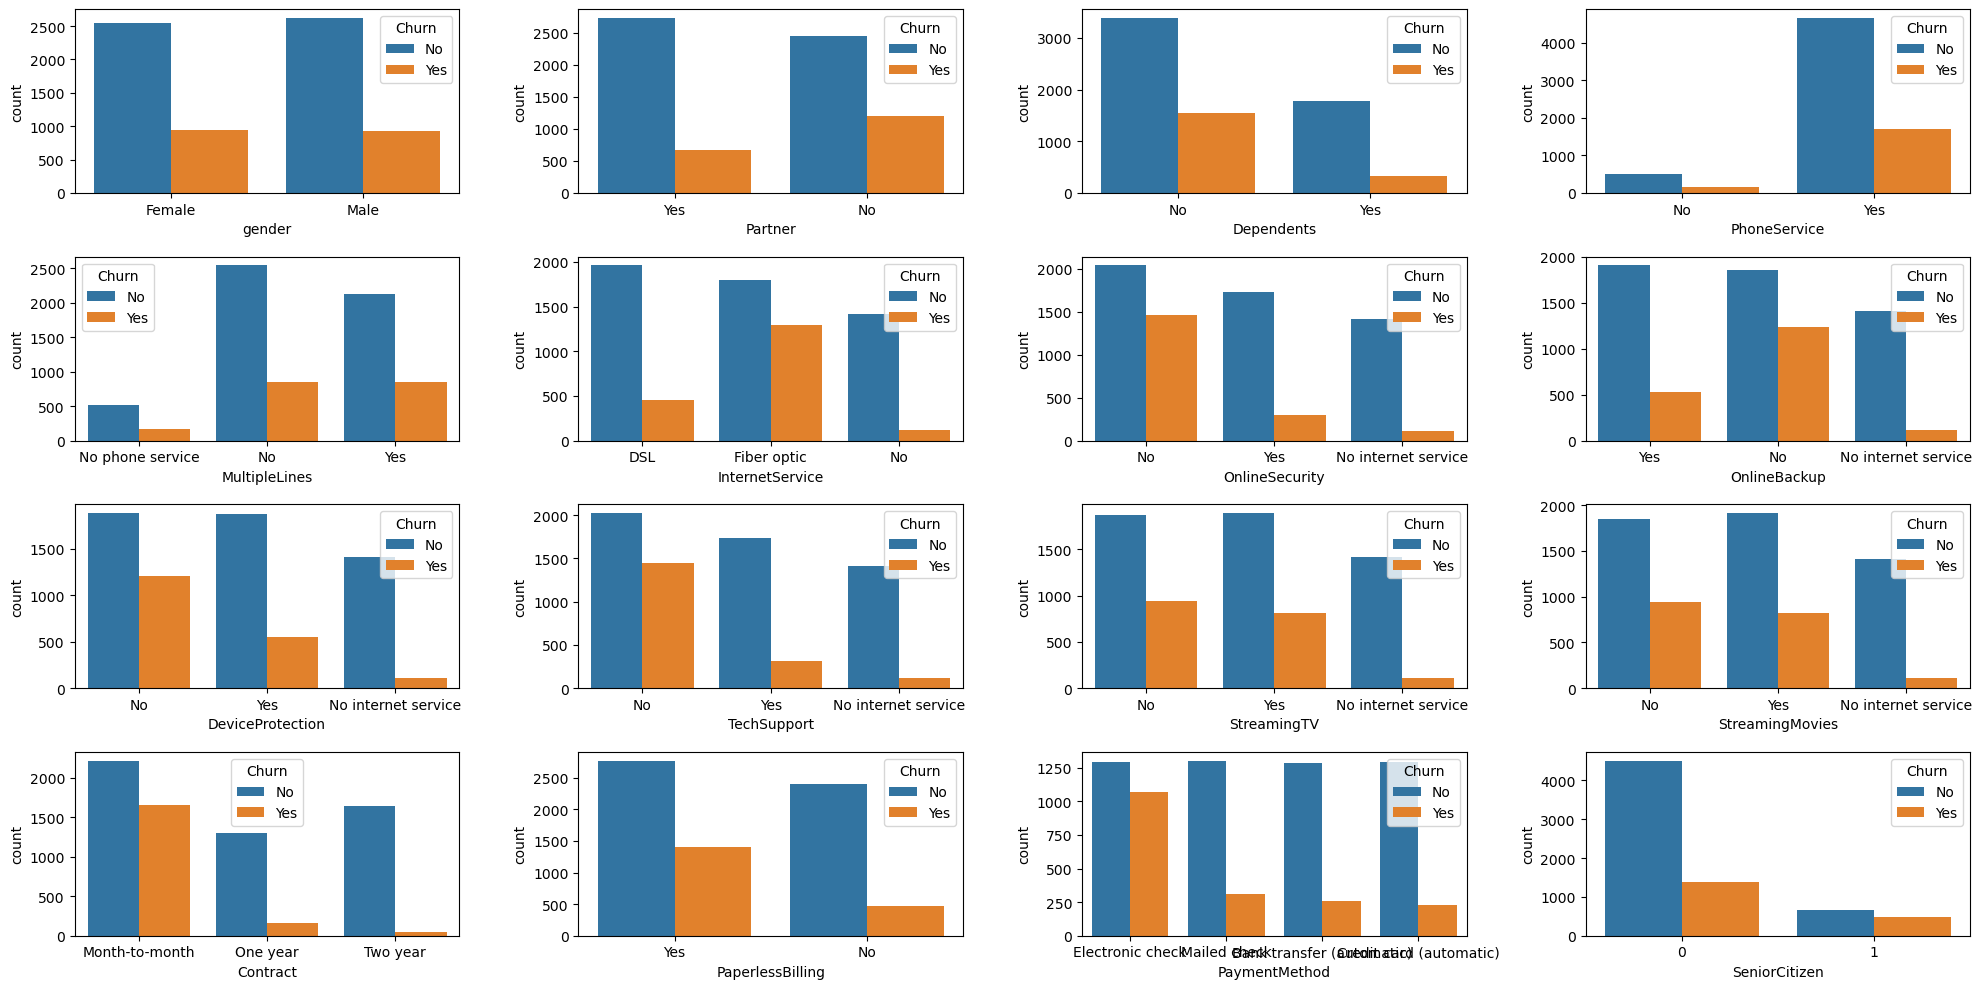

In [38]:
#plot cateogrical features :
cat_features = list(dataset.select_dtypes(include='object').columns)
cat_features.remove('Churn')
cat_features.append('SeniorCitizen')

# Determine the number of subplots needed
num_plots = len(cat_features)
num_rows = (num_plots - 1) // 4 + 1  # Calculate number of rows needed
num_cols = min(num_plots, 4)  # Ensure maximum of 4 columns

# Create subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))
axes = axs.flatten()

# Plot each categorical feature
for i, col in enumerate(cat_features):
    sns.countplot(x=col, hue="Churn", data=dataset, ax=axes[i])

# Remove any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

## Data Cleaning
Total Charges should be numeric amount. Let's convert it to numerical data type

In [39]:
dataset.TotalCharges = pd.to_numeric(dataset.TotalCharges, errors='coerce')
dataset.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Check the missing values

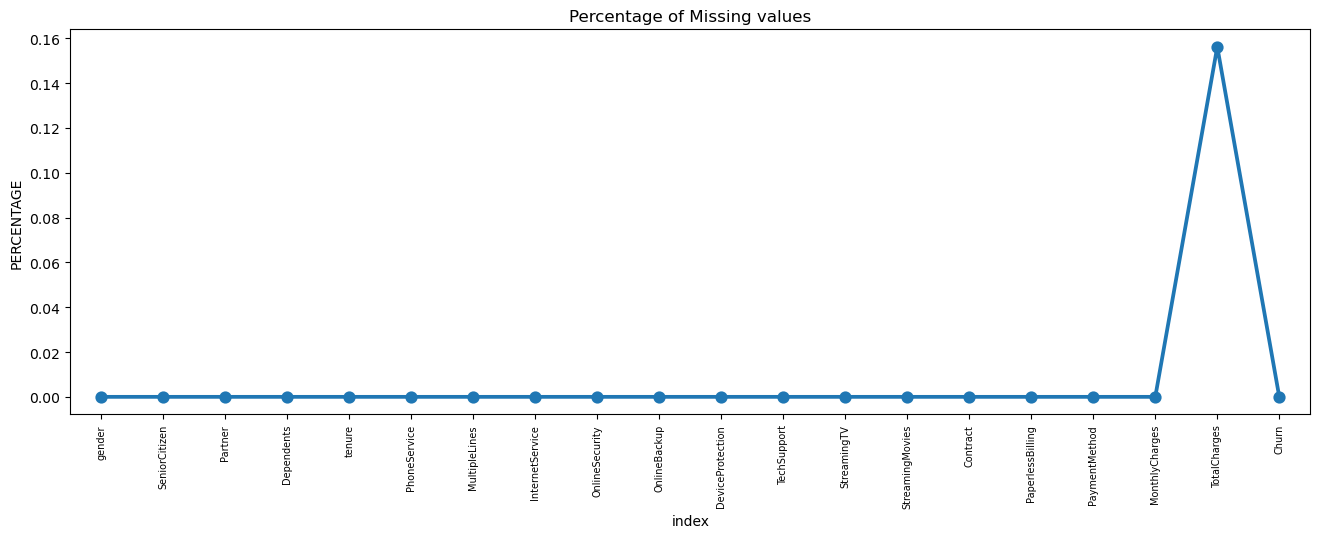

In [40]:
missing = pd.DataFrame((dataset.isnull().sum())*100/dataset.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

We can see there are 11 missing values in TotalCharges column. Let's check these records

In [41]:
dataset.loc[dataset['TotalCharges'].isnull() == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### Missing values treatment

In [42]:
#Removing missing values 
dataset.dropna(how='any', inplace=True)

In [43]:
dataset.shape

(7032, 20)

#### Encoding Categorical values into Numeric using Label Encoder

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for feature in dataset.select_dtypes(include='object').columns:
    dataset[feature] = encoder.fit_transform(dataset[feature])

dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [48]:
dataset.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

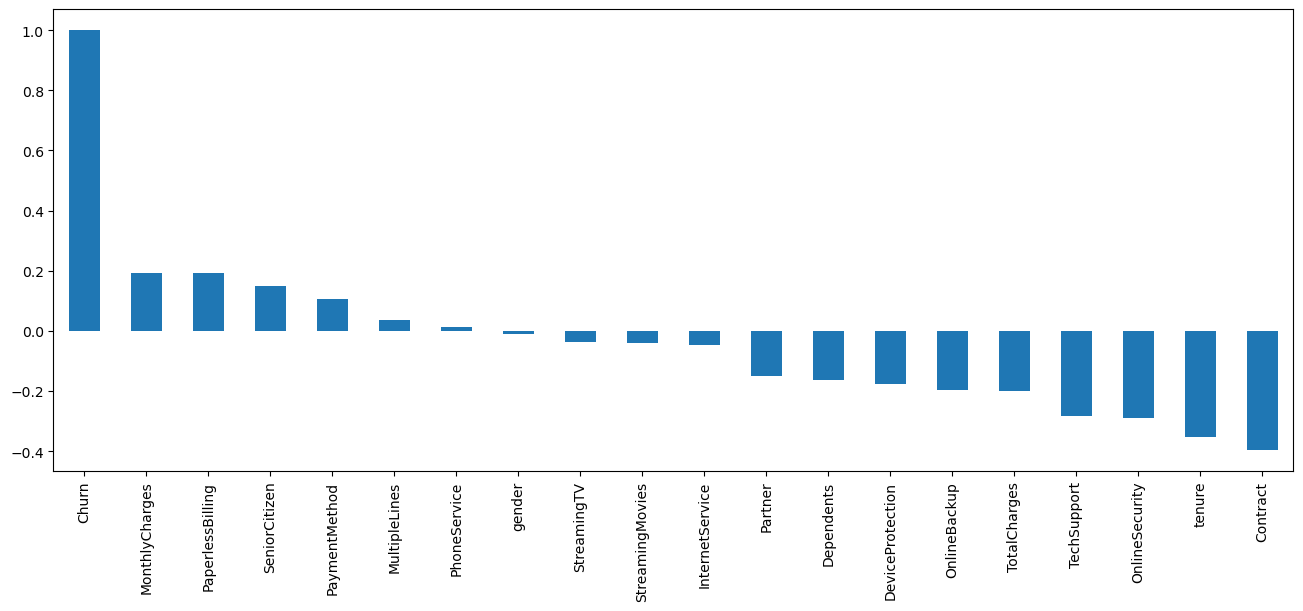

In [49]:
#get correlation of churn with other variables
plt.figure(figsize=(16,6))
dataset.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.show()

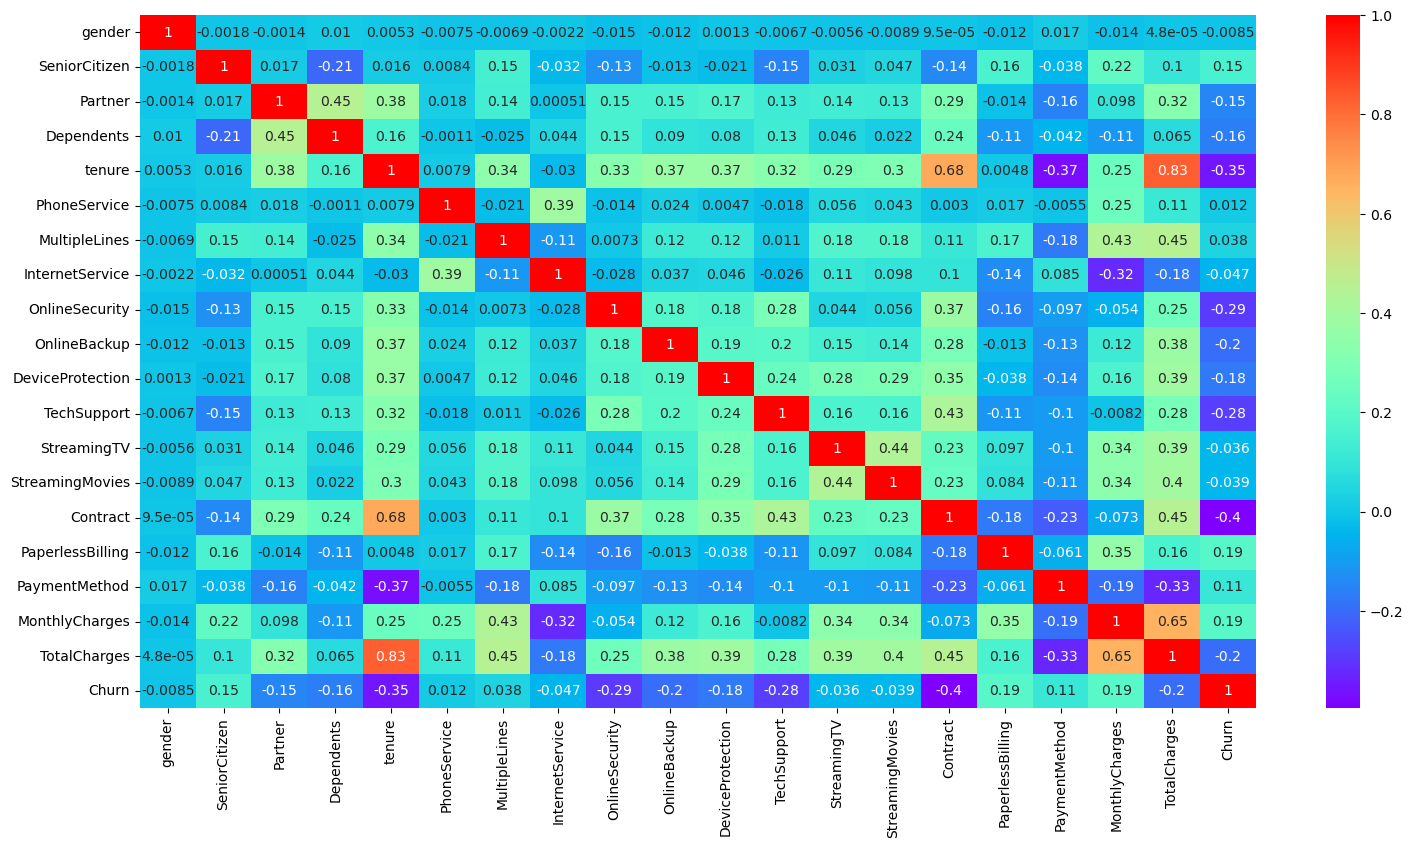

In [50]:
plt.figure(figsize=(18,9))
sns.heatmap(dataset.corr(),annot=True,cmap="rainbow")
plt.show()

Since we are using ensemble methods for model building so there is no need of feature scaling as its prediction is based on creating multiple decision tree

## Saving Data for Model Building

In [52]:
#save cleaned data to csv
dataset.to_csv('../data/telecom_churn_clean_data.csv')